<a href="https://colab.research.google.com/github/AmitGairola/Deep-Learning-with-Tensorflow/blob/main/02%20Artificial%20Neural%20Networks/Logistic_Regression_as_a_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This lab is the first in a series of labs as part of the course on Deep Learning with Tensorflow.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('cancer-data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
## remove the ID and the unnamed column at the end
df = df.iloc[:,1:df.shape[1]-1]

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 31)

In [ ]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df['diagnosis'].value_counts()/df.shape[0]

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [ ]:
# Encode the diagnosis column to 0,1 where 1 means that the cancer is malignant and 0 means it is benign
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B' : 0})

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
# Prepare X and y
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split into training and testing
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y, 
                                                   stratify = y, 
                                                   train_size = 0.8, 
                                                   random_state = 12345)

In [ ]:
print(f"Train shape {X_train.shape} {y_train.shape}")

Train shape (455, 30) (455,)


In [ ]:
print(f"Test shape {X_test.shape} {y_test.shape}")

Test shape (114, 30) (114,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
### (x-mu)/sigma

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
#X_train_sc[0:5]

In [ ]:
# We transpose the X matrix so that each column represents a sample and rows are the features

X_train_n = X_train_sc.T
X_test_n = X_test_sc.T
y_train_n = y_train.values.reshape(1,-1)
y_test_n = y_test.values.reshape(1,-1)

In [ ]:
y_train_n.shape

(1, 455)

In [ ]:
X_train_n.shape

(30, 455)

In [ ]:
print(f"train shape {X_train_n.shape} {y_train_n.shape}")

train shape (30, 455) (1, 455)


In [ ]:
print(f"test shape {X_test_n.shape} {y_test_n.shape}")

test shape (30, 114) (1, 114)


In [ ]:
import scipy as sc

In [ ]:
sc.special.expit(0.5)

0.6224593312018546

In [ ]:
## Sigmoid = 1/(1+exp(-z))

1/(1+np.exp(-0.5))

0.6224593312018546

In [ ]:
# Initialize weights to 0
w = np.zeros((X_train_n.shape[0],1))

In [ ]:
w.shape

(30, 1)

In [ ]:
## A -> (m,n), B -> (n,p)
## A*B -> (m,p)

In [ ]:
b = 0

In [ ]:
alpha = 0.01 ## Learning Rate
num_iters = 100 # Also known as Epochs

In [ ]:
costs = []
m = X_train_n.shape[1]

In [ ]:
m

455

In [ ]:
for i in range(num_iters):
    print(f"Iteration {i}")
    
    ## Calculate prediction based on the weights
    ## Sigmoid(w.T*X+b)
    A = sc.special.expit(np.dot(w.T,X_train_n)+b) ## Forward Propagation
    
    # Compute cost
    cost = np.sum(((- np.log(A))*y_train_n + (-np.log(1-A))*(1-y_train_n)))/m
    
    ## Backward Propagation
    dw = (np.dot(X_train_n,(A-y_train_n).T))/m ## dJ/dw
    db = (np.sum(A-y_train_n))/m ## dJ/db
    
    ## Gradient Descent
    w = w - alpha*dw # w = w - learning rate*dJ/dw
    b = b - alpha*db # b = b - learning rate * dJ/db
    
    # Append cost for plotting
    costs.append(np.squeeze(cost))

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

In [ ]:
nn_tr_predict = sc.special.expit(np.dot(w.T,X_train_n)+b) > 0.5 # Training set prediction
nn_ts_predict = sc.special.expit(np.dot(w.T,X_test_n)+b) > 0.5 # Test set prediction

In [ ]:
nn_ts_predict*1

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0]])

In [ ]:
y_test.values

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# Accuracy on training and test set
acc_tr = accuracy_score(y_pred = nn_tr_predict[0], y_true = y_train_n[0])
acc_ts = accuracy_score(y_pred = nn_ts_predict[0], y_true = y_test_n[0])

In [ ]:
print(f"Train Acc {acc_tr} Test Acc {acc_ts}")

Train Acc 0.9494505494505494 Test Acc 0.9912280701754386


In [ ]:
# Test set confusion matrix
confusion_matrix(y_pred = nn_ts_predict[0], y_true = y_test_n[0])

array([[72,  0],
       [ 1, 41]])

In [ ]:
# Training set confusion matrix
confusion_matrix(y_pred = nn_tr_predict[0], y_true = y_train_n[0])

array([[272,  13],
       [ 10, 160]])

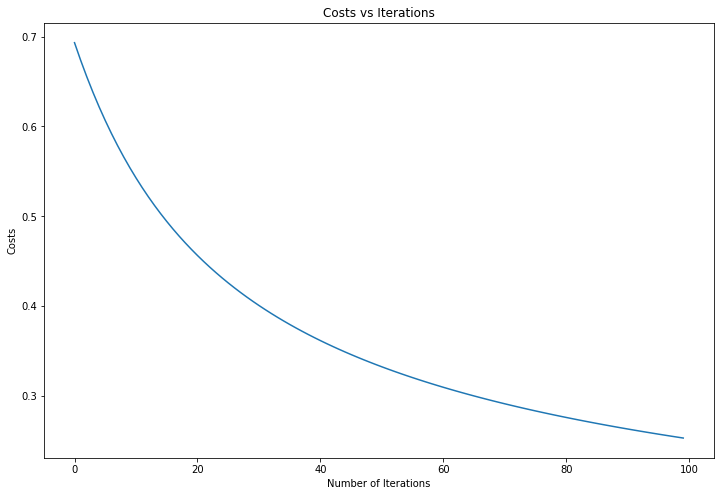

In [ ]:
# Plot how the cost keeps reducing

import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.plot(costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Costs")
plt.title("Costs vs Iterations")
plt.show()

## Logistic Regression from Scikit Learn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_sc, y_train)

LogisticRegression()

In [ ]:
lr_ts_pred = lr_model.predict(X_test_sc)

In [ ]:
accuracy_score(y_pred = lr_ts_pred, y_true = y_test)

0.9736842105263158

# Build Neural Network using Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
np.__version__

'1.18.2'

In [ ]:
## Import Model
from tensorflow.keras.models import Sequential

In [ ]:
# Import layers
from tensorflow.keras.layers import Dense

In [ ]:
# Sequential Neural Network
tf_model = Sequential()

In [ ]:
X_train_sc.shape

(455, 30)

In [ ]:
# First Hidden Layer
tf_model.add(Dense(64, activation = 'relu', input_shape = (30,)))

In [ ]:
# Second Hidden Layer
tf_model.add(Dense(32, activation = 'relu'))

In [ ]:
# Third Hidden Layer
tf_model.add(Dense(16, activation = 'tanh'))

In [ ]:
# Output Layer
tf_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
tf_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1984      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
####
# 30 Nodes in Input Layer
# 64 Nodes in First Hidden layer
# 32 Nodes in Second Hidden Layer
# 1 Node in Output Layer

2080

In [ ]:
# Compile the model
tf_model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics = ['accuracy'])

In [ ]:
# Train the model on the data
results = tf_model.fit(X_train_sc, y_train, epochs = 100)

Epoch 1/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7956
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9429
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9648
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.9648
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0892 - accuracy: 0.9758
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9780
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9780
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9824
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0584 - accuracy: 0.9868
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9846
Epoch 11/

In [ ]:
# Predict the model on the test set
y_pred_ts = tf_model.predict(X_test_sc)

In [ ]:
y_pred_ts[0:5]

array([[9.9975836e-01],
       [1.2969971e-04],
       [3.4251809e-04],
       [9.9988967e-01],
       [1.1278934e-04]], dtype=float32)

In [ ]:
y_pred_ts[0:5] > 0.5

array([[ True],
       [False],
       [False],
       [ True],
       [False]])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
y_pred_ts = (y_pred_ts > 0.5)*1.0

In [ ]:
y_pred_ts[0:5]

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [ ]:
#y_pred_ts

In [ ]:
accuracy_score(y_pred = y_pred_ts, y_true = y_test)

0.9736842105263158

In [ ]:
confusion_matrix(y_pred = y_pred_ts, y_true = y_test)

array([[72,  0],
       [ 3, 39]])

In [ ]:
df_output = pd.DataFrame(results.history)

In [ ]:
df_output.head()

,loss,accuracy
0,0.489855,0.795604
1,0.232339,0.942857
2,0.146124,0.964835
3,0.109073,0.964835
4,0.089210,0.975824


In [ ]:
import matplotlib.pyplot as plt

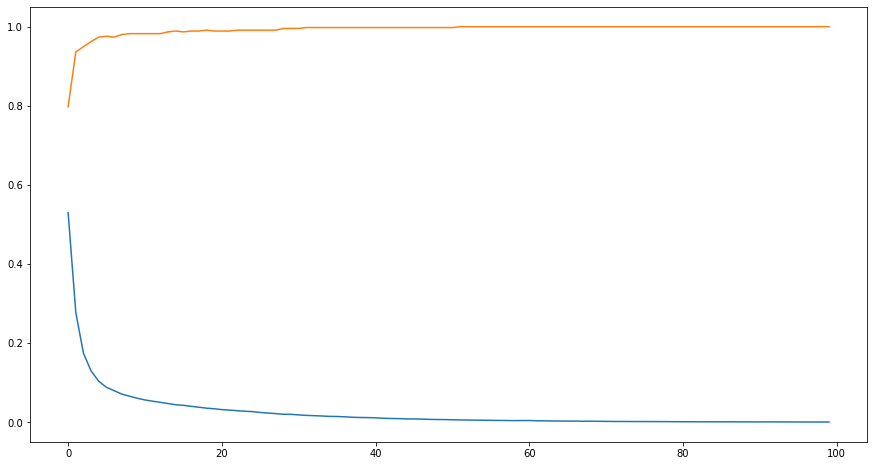

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(df_output['loss'])
plt.plot(df_output['accuracy'])
plt.show()